<a href="https://colab.research.google.com/github/Nakul24-1/Viz-for-ML/blob/main/Calibrating%20ML%20Models/Assignment%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

In this homework you will use `sklearn` to analyze and visualize model performance. You will be required to use the _new_ `sklearn` implementations, as well as write some of your own functions. You can see `sklearn`'s new visualization API documentation [here](https://scikit-learn.org/stable/visualizations.html#visualizations).

*Do not change* the code block below. It generates the data and trains the model you use.

In [ ]:
# Constants. DO NOT CHANGE.
RANDOM_STATE = 2022

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1_000, n_features=20, n_informative=2, n_redundant=10, random_state=RANDOM_STATE
)  # Generate data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=RANDOM_STATE
)  # Split into test and train set

clf = RandomForestClassifier(random_state=RANDOM_STATE)  # Random Forest model
clf.fit(X_train, y_train)

y_preds_proba = clf.predict_proba(X_test)  # Predicted probabilities
y_preds_label = clf.predict(X_test)  # Predicted label

In [ ]:
# Probability predictions. First column is for class "0", second is for class "1"
y_preds_proba

array([[0.99, 0.01],
       [0.91, 0.09],
       [0.1 , 0.9 ],
       ...,
       [0.99, 0.01],
       [0.09, 0.91],
       [0.26, 0.74]])

In [ ]:
# Label predictions using a standard 0.5 threshold
y_preds_label

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,

# (1) Plot Confusion Matrix

Plot the confusion matrix for the test set.

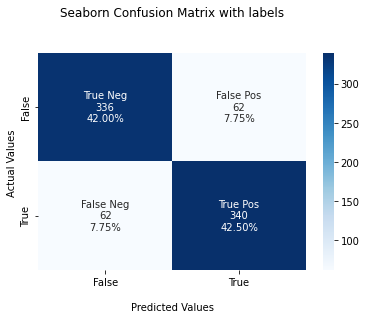

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for the test set.
cf_matrix = confusion_matrix(y_test, y_preds_label)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# (2) Classification Report

Calculate the precision, recall, accuracy and f1-score for the test set.

In [ ]:
# Calculate the precision, recall, accuracy and f1-score for the test set.

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

f1score = (f1_score(y_test, y_preds_label, average="macro"))
precision = (precision_score(y_test, y_preds_label, average="macro"))
recall = (recall_score(y_test, y_preds_label, average="macro"))  
accuracy =  accuracy_score(y_test, y_preds_label)

print('Accuracy: {}'.format(accuracy))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))


Accuracy: 0.845
precision: 0.8449961249031226
recall: 0.8449961249031226
fscore: 0.8449961249031226


# (3) Plot ROC Curve and Report AUC

Plot the ROC curve and report the AUC for the test set.

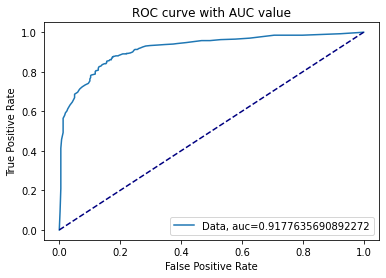

In [ ]:
# Plot the ROC curve and report the AUC for the test set.
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test,  y_preds_proba[::,1])
auc = metrics.roc_auc_score(y_test, y_preds_proba[::,1])
plt.plot(fpr,tpr,label="Data, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve with AUC value")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.show()

# (4) Expected Calibration Error (ECE), Maximum Calibration Error (MCE), Plot Reliability Diagram

Using `calibration_curve`, which you can access via `from sklearn.calibration import calibration_curve`, calculate:

ECE when `calibration_curve(..., method="quantile")` -- this produces bins of equal sample size
MCE when `calibration_curve(..., method="uniform")` -- this produces bins of equal width

Then, plot the reliability diagram for `method="quantile"` and `method="uniform"`. Comment on which one you believe is "better" to report (i.e., what are the pros and cons of using "quantile" compared to "uniform")



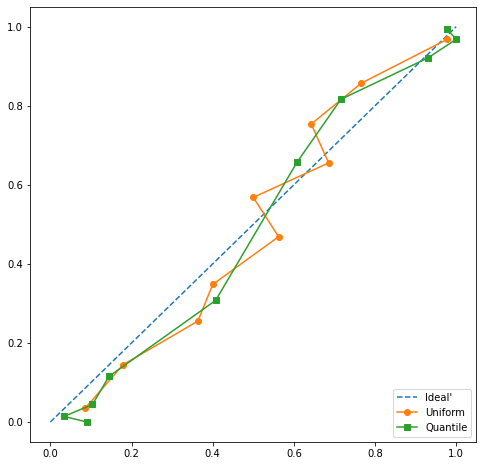

In [ ]:
# Calculated ECE for calibration_curve(..., strategy="quantile")

# Calculate MCE for calibration_curve(..., strategy="uniform")

# Plot reliability diagrams for each

from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(8, 8))

colors = plt.cm.get_cmap("Dark2")
n_bins=10


prob_true, prob_pred = calibration_curve(y_test, y_preds_proba[::,1],n_bins=10 ,strategy = "uniform")

prob_true_2, prob_pred_2 = calibration_curve(y_test, y_preds_proba[::,1],n_bins=10 ,strategy = "quantile")

plt.plot([0, 1], [0, 1], linestyle='--',label="Ideal'")


plt.plot(prob_true, prob_pred ,marker='o',label="Uniform")
plt.plot(prob_true_2, prob_pred_2  ,marker='s',label="Quantile")
plt.legend(loc=4)

In [ ]:
abs(prob_true - prob_pred) # Uniform

array([0.05086142, 0.03432836, 0.10818182, 0.052     , 0.09375   ,
       0.06818182, 0.03028571, 0.11089286, 0.09109375, 0.00973333])

In [ ]:
np.max(np.abs(prob_true - prob_pred)) # Uniform MCE

0.11089285714285724

In [ ]:
abs(prob_true_2 - prob_pred_2) #Quantile

array([0.09090909, 0.01922222, 0.05933962, 0.029     , 0.09950617,
       0.04924051, 0.10037037, 0.00944444, 0.03182927, 0.01767442])

In [ ]:
sum(abs(prob_true_2 - prob_pred_2)/n_bins) #Quantile ECE

0.050653611665359165

### Comparision between 'quantile' and 'Uniform'

Uniform has data bins at equal length.

**Pros**

This allows to have same intervals for and thus is easier when used to compare different curves for different models on the same data.
Best used when data is unifromly distributed.

**Cons**

If there is no prediction in a specific bin,no point will be plotted.
Also it doesn't work well when the data is not uniformly distributed, for example if all data in the upper range and lower range has very few points, it is expected that we want to give more weight to the upper points, uniform graph does not allow that.

Quantile has data bins with equal number of datapoints.

**Pros**

This allows to have intervals to have the same number of data point and thus makes more sense when comparing data which is not distributed uniformly.

It is more useful when working with skewed data.

**Cons**

It becomes slightly more difficult to compare different models as they might have bins at different locations.
It is more computationally expensive.
In this view even a well calibrated model might not appear regular.





# (5) Brier Score and Log Loss

Write your own Brier Score and Log Loss functions for the data from above. Ensure that the outputs equal those from `sklearn`. You can access `sklearn`'s implementation using 

```
from sklearn.metrics import brier_score_loss, log_loss
```

DO NOT simply write a wrapper for `sklearn`'s implementation. Write your own, test it, and show the results of the test.

In [ ]:
import numpy as np







In [ ]:
from sklearn.metrics import brier_score_loss, log_loss

brier_score_loss(y_test,y_preds_proba[::,1]),log_loss(y_test,y_preds_proba[::,1])

(0.1130645, 0.521981147990606)

In [ ]:
def custom_brier_score(x,y):

  losses = np.subtract(x,y)**2

  brier_score = losses.sum()/len(losses)
  return brier_score

def custom_log_loss(x,y):
  eps = 1e-15
  predicted = np.clip(x, eps, 1-eps)
  loss = -1 * np.mean(y * np.log(predicted) + (1 - y) * np.log(1-predicted))

  return loss
  

In [ ]:
print(custom_brier_score(y_test, y_preds_proba[::,1]))

0.1130645


In [ ]:
log_loss=0

for x in range(0, len(y_preds_proba[::,1])):
     log_loss += custom_log_loss(y_preds_proba[::,1][x], y_test[x])
log_loss = log_loss/len(y_preds_proba[::,1])
print(log_loss)

0.5219811479906065
